<a href="https://colab.research.google.com/github/erickgt00/Deep-Learning/blob/main/Prediccion_con_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción usando Keras

In [1]:
#PASO 0. INSTALACION DE LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot
from numpy import array

In [2]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [3]:
serieP=array([10,25,23,14,25,23,14,85,14,36])
print(serieP)

[10 25 23 14 25 23 14 85 14 36]


In [4]:
def DescomponerSerie(serie,longitud):
    global X, y
    X, y=list(), list()
    for i in range(len(serie)):
        final=i+longitud
        if final > len(serie)-1:
            break
        historia_x, target_y=serie[i:final], serie[final]
        X.append(historia_x)
        y.append(target_y)
    return array(X), array(y)

In [5]:
DescomponerSerie(serieP,3)

(array([[10, 25, 23],
        [25, 23, 14],
        [23, 14, 25],
        [14, 25, 23],
        [25, 23, 14],
        [23, 14, 85],
        [14, 85, 14]]),
 array([14, 25, 23, 14, 85, 14, 36]))

In [6]:
for i in range(len(X)):
    print(X[i], y[i])

[10 25 23] 14
[25 23 14] 25
[23 14 25] 23
[14 25 23] 14
[25 23 14] 85
[23 14 85] 14
[14 85 14] 36


In [11]:
#PASO 1. LEER LA BASE DE DATOS
PP = pd.read_csv("PrecioPetroleoDEF.csv")
PP.head()

,Fecha,Mezcla_Mexicana
0,03/01/05,31.42
1,04/01/05,32.77
2,05/01/05,32.64
3,06/01/05,33.95
4,07/01/05,34.15


In [12]:
PP['Fecha'] = pd.to_datetime(PP['Fecha'], infer_datetime_format=True)
PP=pd.DataFrame(PP)
PP.head()

,Fecha,Mezcla_Mexicana
0,2005-03-01,31.42
1,2005-04-01,32.77
2,2005-05-01,32.64
3,2005-06-01,33.95
4,2005-07-01,34.15


In [13]:
PP.columns

Index(['Fecha', 'Mezcla_Mexicana'], dtype='object')

In [14]:
PP.columns = ["Fecha","PrecioBarril"]
PP.head()

,Fecha,PrecioBarril
0,2005-03-01,31.42
1,2005-04-01,32.77
2,2005-05-01,32.64
3,2005-06-01,33.95
4,2005-07-01,34.15


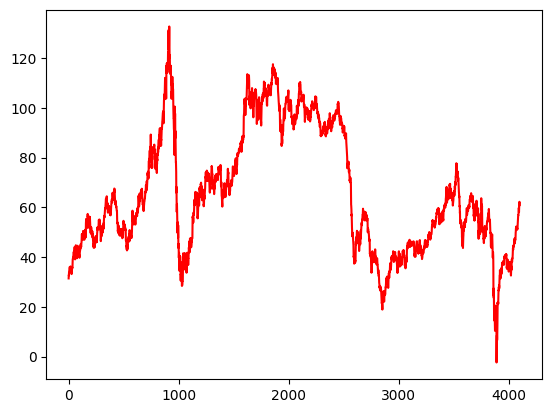

In [15]:
plt.plot(PP["PrecioBarril"],color="red")

<Axes: xlabel='Fecha'>

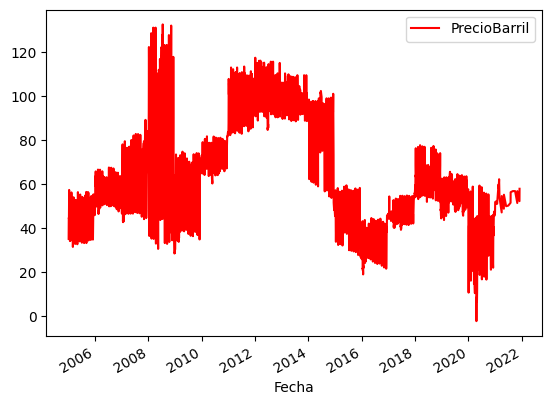

In [16]:
PP.plot(x="Fecha", y="PrecioBarril",color="red")

In [17]:
SecuenciaPrecios = list(PP["PrecioBarril"])
print(SecuenciaPrecios)

[31.42, 32.77, 32.64, 33.95, 34.15, 34.35, 34.6, 34.75, 35.69, 35.99, 35.95, 35.85, 34.62, 34.08, 35.34, 35.75, 36.21, 36.26, 36.14, 35.05, 35.39, 35.09, 34.38, 34.24, 34.55, 33.34, 33.17, 33.17, 34.41, 34.9, 35.13, 35.18, 36.02, 35.52, 36.1, 36.27, 38.02, 39.1, 39.25, 39.58, 39.79, 39.53, 40.33, 41.17, 41.23, 41.42, 42.12, 42.0, 41.48, 41.95, 42.18, 42.26, 43.28, 43.47, 44.04, 43.82, 43.18, 39.09, 39.09, 39.09, 41.03, 41.31, 40.97, 42.26, 44.67, 44.71, 44.09, 44.55, 43.32, 43.28, 43.35, 41.28, 40.22, 40.63, 40.47, 39.53, 40.9, 41.54, 42.68, 43.53, 43.23, 44.56, 42.54, 42.58, 40.93, 41.9, 41.23, 42.16, 42.48, 42.62, 43.87, 43.82, 42.99, 41.49, 40.48, 40.52, 40.95, 40.08, 39.74, 40.12, 41.06, 41.5, 42.13, 42.37, 42.95, 43.05, 43.08, 44.4, 44.16, 45.27, 45.27, 44.6, 43.76, 44.48, 44.24, 45.55, 45.69, 45.93, 46.75, 48.53, 49.23, 49.09, 48.5, 49.04, 49.11, 49.33, 48.93, 47.39, 46.94, 48.75, 48.42, 49.14, 50.43, 50.15, 49.8, 49.18, 50.49, 49.85, 48.04, 48.35, 47.48, 47.55, 46.95, 47.04, 47.

In [18]:
DescomponerSerie(SecuenciaPrecios,3)

(array([[31.42, 32.77, 32.64],
        [32.77, 32.64, 33.95],
        [32.64, 33.95, 34.15],
        ...,
        [58.07, 60.1 , 60.53],
        [60.1 , 60.53, 61.85],
        [60.53, 61.85, 62.23]]),
 array([33.95, 34.15, 34.35, ..., 61.85, 62.23, 60.89]))

In [19]:
for i in range(len(X)):
    print(X[i], y[i])

[31.42, 32.77, 32.64] 33.95
[32.77, 32.64, 33.95] 34.15
[32.64, 33.95, 34.15] 34.35
[33.95, 34.15, 34.35] 34.6
[34.15, 34.35, 34.6] 34.75
[34.35, 34.6, 34.75] 35.69
[34.6, 34.75, 35.69] 35.99
[34.75, 35.69, 35.99] 35.95
[35.69, 35.99, 35.95] 35.85
[35.99, 35.95, 35.85] 34.62
[35.95, 35.85, 34.62] 34.08
[35.85, 34.62, 34.08] 35.34
[34.62, 34.08, 35.34] 35.75
[34.08, 35.34, 35.75] 36.21
[35.34, 35.75, 36.21] 36.26
[35.75, 36.21, 36.26] 36.14
[36.21, 36.26, 36.14] 35.05
[36.26, 36.14, 35.05] 35.39
[36.14, 35.05, 35.39] 35.09
[35.05, 35.39, 35.09] 34.38
[35.39, 35.09, 34.38] 34.24
[35.09, 34.38, 34.24] 34.55
[34.38, 34.24, 34.55] 33.34
[34.24, 34.55, 33.34] 33.17
[34.55, 33.34, 33.17] 33.17
[33.34, 33.17, 33.17] 34.41
[33.17, 33.17, 34.41] 34.9
[33.17, 34.41, 34.9] 35.13
[34.41, 34.9, 35.13] 35.18
[34.9, 35.13, 35.18] 36.02
[35.13, 35.18, 36.02] 35.52
[35.18, 36.02, 35.52] 36.1
[36.02, 35.52, 36.1] 36.27
[35.52, 36.1, 36.27] 38.02
[36.1, 36.27, 38.02] 39.1
[36.27, 38.02, 39.1] 39.25
[38.02

In [28]:
# define model
model = Sequential()
model.add(Dense(5, activation='relu', input_dim=3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='ADAM', metrics=['accuracy'])

In [29]:
#TRAIN THE MODEL
model.fit(X, y, epochs=10, batch_size=10)

Epoch 1/10
410/410 [==============================] - 1s 1ms/step - loss: 403.4904 - accuracy: 0.0000e+00
Epoch 2/10
410/410 [==============================] - 0s 1ms/step - loss: 6.4404 - accuracy: 0.0000e+00
Epoch 3/10
410/410 [==============================] - 0s 1ms/step - loss: 6.4105 - accuracy: 0.0000e+00
Epoch 4/10
410/410 [==============================] - 0s 1ms/step - loss: 6.3829 - accuracy: 0.0000e+00
Epoch 5/10
410/410 [==============================] - 0s 979us/step - loss: 6.3238 - accuracy: 0.0000e+00
Epoch 6/10
410/410 [==============================] - 0s 1ms/step - loss: 6.2875 - accuracy: 0.0000e+00
Epoch 7/10
410/410 [==============================] - 0s 980us/step - loss: 6.2065 - accuracy: 0.0000e+00
Epoch 8/10
410/410 [==============================] - 0s 971us/step - loss: 6.1555 - accuracy: 0.0000e+00
Epoch 9/10
410/410 [==============================] - 1s 1ms/step - loss: 6.0084 - accuracy: 0.0000e+00
Epoch 10/10
410/410 [==============================] - 1

In [30]:
#PREDICCIONES`
print("Generate predictions for 3 samples")
predictions = model.predict(X)
print("predictions shape:", predictions)

Generate predictions for 3 samples
128/128 [==============================] - 0s 720us/step
predictions shape: [[30.89449 ]
 [33.128597]
 [32.22865 ]
 ...
 [57.23531 ]
 [59.97288 ]
 [59.828766]]


In [31]:
Predictions=pd.DataFrame(predictions)
Predictions.columns = ["Predictions"]
Predictions.head()

,Predictions
0,30.894489
1,33.128597
2,32.228649
3,33.807583
4,34.023132


In [32]:
Real=pd.DataFrame(y)
Real.columns = ["Real"]
Real.head()

,Real
0,33.95
1,34.15
2,34.35
3,34.60
4,34.75


In [33]:
RealPredictions=pd.concat([Predictions,Real],axis=1)
RealPredictions=pd.DataFrame(RealPredictions)
RealPredictions.head()

,Predictions,Real
0,30.894489,33.95
1,33.128597,34.15
2,32.228649,34.35
3,33.807583,34.60
4,34.023132,34.75


<Axes: >

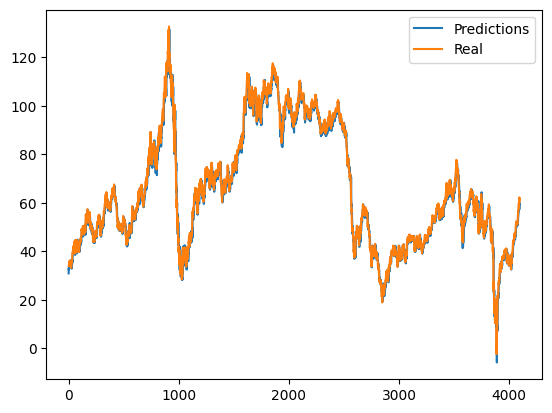

In [34]:
RealPredictions.plot(y=['Predictions','Real'])

In [35]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, 3))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[70.42397]]
